<a href="https://colab.research.google.com/github/shaik45-srm/COMPUTER_VISION_1-2/blob/main/COMPUTER_VISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNIT 2 ------>  Object Labeling, Counting, and Size Filtering in Biological Images

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/6/69/Leaves_green_background.jpg"


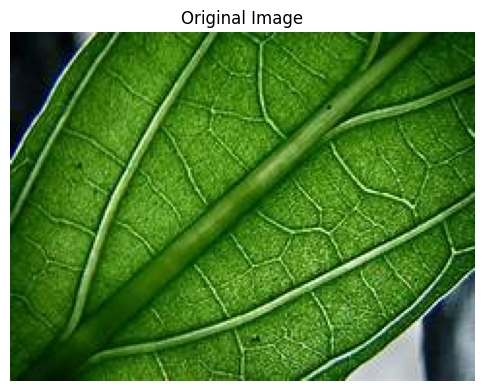

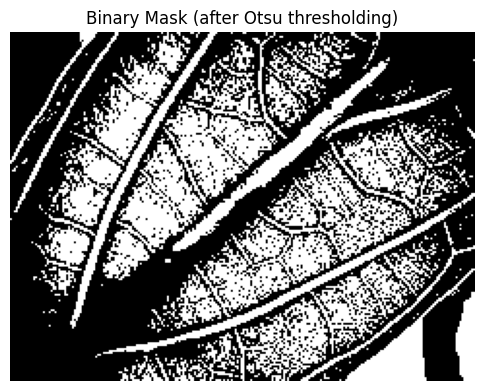

Total detected objects (before filtering): 285
Objects remaining after filtering: 18


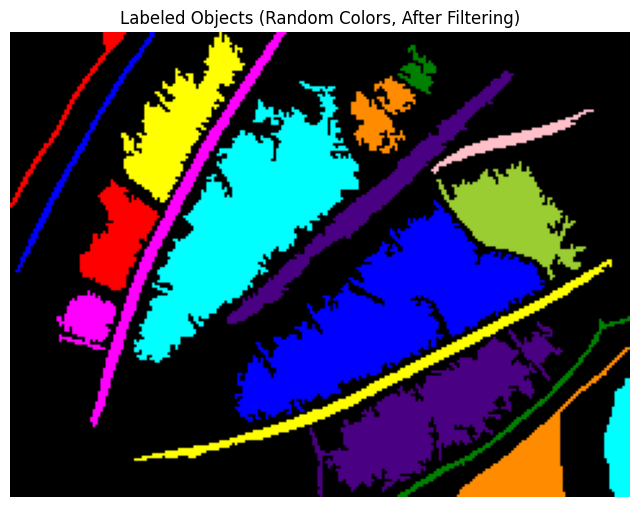

In [ ]:
# 📦 STEP 1: Install and import necessary libraries
!pip install scikit-image opencv-python matplotlib numpy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology, color, io, filters

# 🌐 STEP 2: Load a sample image from the web (you can replace this with your own upload)
url = "https://tse4.mm.bing.net/th/id/OIP.k_cXSxMy-L3qjoaivHxOjQHaFj?pid=Api&P=0&h=180"
image = io.imread(url)

plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# 🧮 STEP 3: Convert to grayscale and threshold
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
thresh = filters.threshold_otsu(gray)
binary = gray > thresh

plt.figure(figsize=(6,6))
plt.title("Binary Mask (after Otsu thresholding)")
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()

# 🧩 STEP 4: Label connected components
labels = measure.label(binary)
props = measure.regionprops(labels)

print(f"Total detected objects (before filtering): {len(props)}")

# 🧹 STEP 5: Filter objects by size (area)
min_size = 100   # remove very small objects (noise)
max_size = 10000 # optional, we can use it later if needed

# Remove small objects and small holes → returns boolean mask
filtered_mask = morphology.remove_small_objects(labels > 0, min_size=min_size)
filtered_mask = morphology.remove_small_holes(filtered_mask, area_threshold=500)

# 🔁 Relabel the filtered binary mask to get integer labels again
filtered_labels = measure.label(filtered_mask)

# Measure region properties again
props_filtered = measure.regionprops(filtered_labels)

print(f"Objects remaining after filtering: {len(props_filtered)}")

# 🎨 STEP 6: Visualize labeled objects
colored_labels = color.label2rgb(filtered_labels, bg_label=0, bg_color=(0,0,0))

plt.figure(figsize=(8,8))
plt.title("Labeled Objects (Random Colors, After Filtering)")
plt.imshow(colored_labels)
plt.axis('off')
plt.show()


UNIT 1 ---------> Comparative Analysis of Edge Detection Techniques in Digital Image Processing

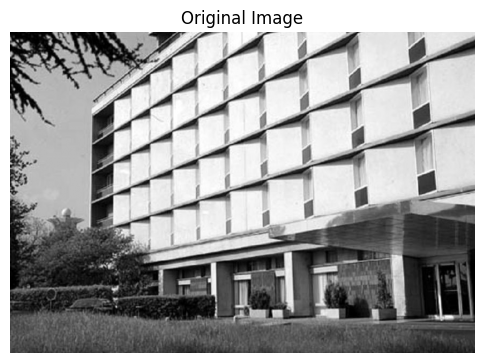

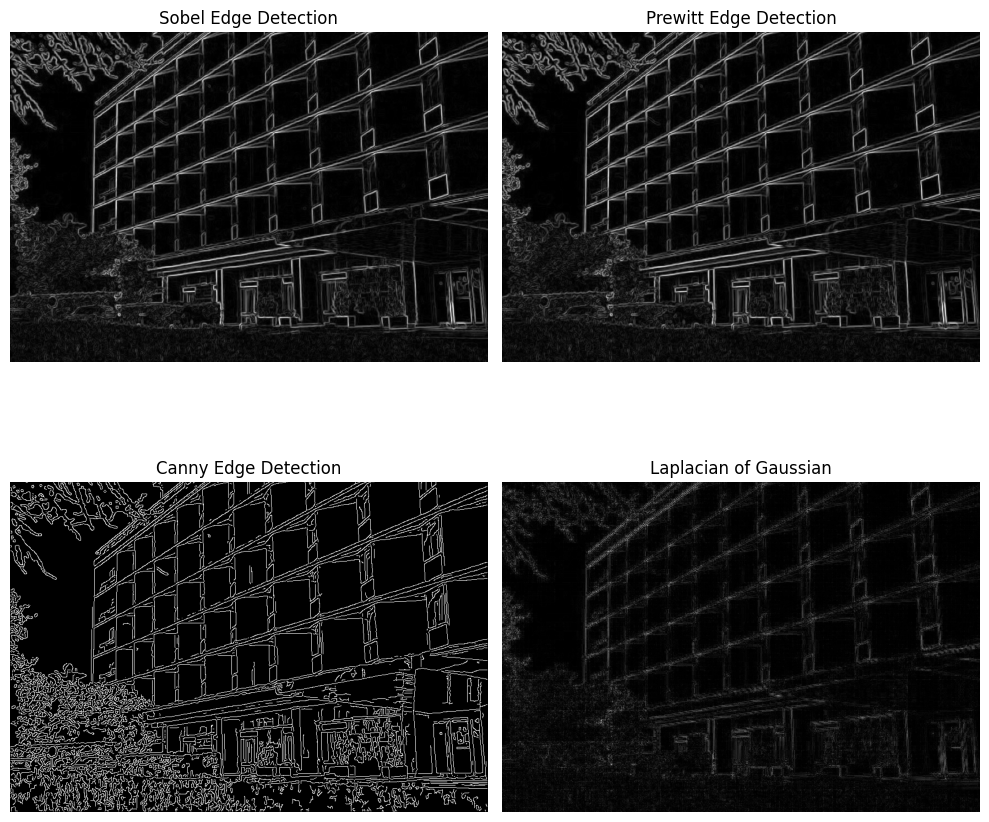

In [ ]:
# 📦 Step 1: Install dependencies
!pip install opencv-python matplotlib numpy scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, feature, io, color

# 🌐 Step 2: Load a sample image (replace URL if desired)
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/building.jpg"
image = io.imread(url)
gray = color.rgb2gray(image)


plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# 🧮 Step 3: Apply different edge detection techniques
edges_sobel = filters.sobel(gray)
edges_prewitt = filters.prewitt(gray)
edges_canny = feature.canny(gray, sigma=1)
edges_laplacian = cv2.Laplacian((gray*255).astype(np.uint8), cv2.CV_64F)

# 🖼️ Step 4: Display all results for comparison
fig, axes = plt.subplots(2, 2, figsize=(10,10))
ax = axes.ravel()

ax[0].imshow(edges_sobel, cmap='gray')
ax[0].set_title("Sobel Edge Detection")

ax[1].imshow(edges_prewitt, cmap='gray')
ax[1].set_title("Prewitt Edge Detection")

ax[2].imshow(edges_canny, cmap='gray')
ax[2].set_title("Canny Edge Detection")

ax[3].imshow(np.abs(edges_laplacian), cmap='gray')
ax[3].set_title("Laplacian of Gaussian")

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
